<a href="https://colab.research.google.com/github/kalyankargouri/computer-vision/blob/main/experiment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


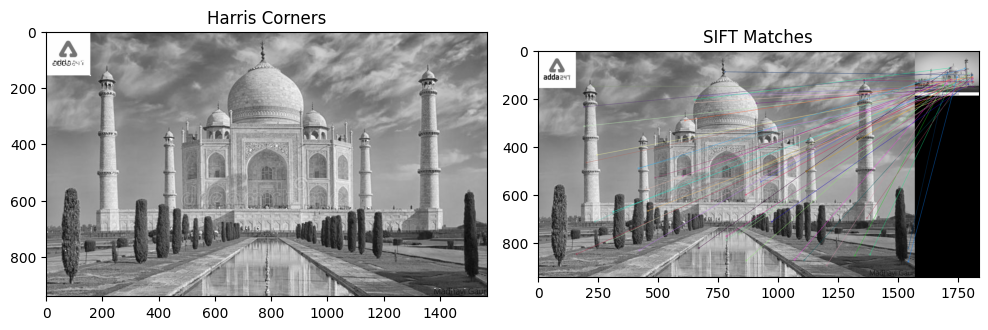

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load two images to compare
img1 = cv2.imread('/content/drive/MyDrive/imagesclg/tajmahal1.jpg', cv2.IMREAD_GRAYSCALE) # Source image
img2 = cv2.imread('/content/drive/MyDrive/imagesclg/tajmahal.jpg', cv2.IMREAD_GRAYSCALE) # Destination image

# Check if images loaded properly
if img1 is None or img2 is None:
    print("Error: Unable to load images. Please check the file paths.")
else:
    # ----- Step 1: Detect Keypoints ----- #
    # Harris Corner Detection (Detects corners as keypoints)
    # Harris corner detector requires an image in grayscale
    harris_corners = cv2.cornerHarris(img1, blockSize=2, ksize=3, k=0.04)
    harris_corners = cv2.dilate(harris_corners, None) # Dilate to mark the corners

    # Visualize Harris corners on the source image
    img1_harris = img1.copy()
    img1_harris[harris_corners > 0.01 * harris_corners.max()] = 255

    # ---- Step 2: Detect keypoints using SIFT
    # SIFT (Scale-Invariant Feature Transform)
    sift = cv2.SIFT_create()
    keypoints1_sift, descriptors1_sift = sift.detectAndCompute(img1, None)
    keypoints2_sift, descriptors2_sift = sift.detectAndCompute(img2, None)


    # ----- Step 3: Match Features ----- #
    # Brute-Force Matcher (for SIFT or ORB descriptors)
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

    # Match SIFT descriptors
    matches_sift = bf.match(descriptors1_sift, descriptors2_sift)
    matches_sift = sorted(matches_sift, key=lambda x: x.distance)

    # ----- Step 4: Visualize Matches ----- #
    # Draw matches for SIFT
    img_matches_sift = cv2.drawMatches(img1, keypoints1_sift, img2, keypoints2_sift, matches_sift[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display Results
    plt.figure(figsize=(10, 10))

    # Harris Corner
    plt.subplot(2, 2, 1), plt.imshow(img1_harris, cmap='gray'), plt.title('Harris Corners')

    # SIFT Matches
    plt.subplot(2, 2, 2), plt.imshow(img_matches_sift), plt.title('SIFT Matches')


    plt.tight_layout()
    plt.show()